In [3]:
def accuracy(y_true, y_pred): 
    """
    Function to calculate accuracy
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: accuracy score
    """
    # initialize a simple counter for correct predictions 
    correct_counter = 0
    # loop over all elements of y_true
    # and y_pred "together"
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            # if prediction is equal to truth, increase the counter 
            correct_counter += 1
    # return accuracy
    # which is correct predictions over the number of samples 
    return correct_counter / len(y_true)

In [4]:
from sklearn import metrics
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]
metrics.accuracy_score(l1, l2)

0.625

In [5]:
def true_positive(y_true, y_pred): 
    """
    Function to calculate True Positives :param y_true: list of true values :param y_pred: list of predicted values :return: number of true positives
    """
    # initialize
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1: 
            tp += 1
    return tp

In [6]:
def true_negative(y_true, y_pred): 
    """
    Function to calculate True Negatives :param y_true: list of true values :param y_pred: list of predicted values :return: number of true negatives
    """
    # initialize
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0: 
            tn += 1
    return tn

In [7]:

def false_positive(y_true, y_pred): 
    """
    Function to calculate False Positives :param y_true: list of true values :param y_pred: list of predicted values :return: number of false positives
    """
    # initialize
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1: 
            fp += 1
    return fp

In [8]:
def false_negative(y_true, y_pred): 
    """
    Function to calculate False Negatives :param y_true: list of true values :param y_pred: list of predicted values :return: number of false negatives
    """
    # initialize
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0: 
            fn += 1
    return fn

In [9]:
l1 = [0,1,1,1,0,0,0,1] 
l2 = [0,1,0,1,0,1,0,0]

In [10]:
true_positive(l1, l2)

2

In [11]:
false_positive(l1, l2)

1

In [12]:
false_negative(l1, l2)

2

In [13]:
true_negative(l1, l2)

3

In [14]:
def accuracy_v2(y_true, y_pred):
    """
    Function to calculate accuracy using tp/tn/fp/fn :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: accuracy score
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    tn = true_negative(y_true, y_pred) 
    accuracy_score = (tp + tn) / (tp + tn + fp + fn) 
    return accuracy_score

In [15]:
l1 = [0,1,1,1,0,0,0,1] 
l2 = [0,1,0,1,0,1,0,0]

In [16]:
accuracy(l1, l2)

0.625

In [17]:
accuracy_v2(l1, l2)

0.625

In [18]:
metrics.accuracy_score(l1, l2)

0.625

In [19]:
def precision(y_true, y_pred):
    """
    Function to calculate precision
    :param y_true: list of true values :param y_pred: list of predicted values :return: precision score
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred) 
    precision = tp / (tp + fp)
    return precision

In [20]:
l1 = [0,1,1,1,0,0,0,1] 
l2 = [0,1,0,1,0,1,0,0]

In [21]:
precision(l1, l2)

0.6666666666666666

In [22]:
def recall(y_true, y_pred):
    """
    Function to calculate recall
    :param y_true: list of true values :param y_pred: list of predicted values :return: recall score
    """
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred) 
    recall = tp / (tp + fn)
    return recall

In [23]:
l1 = [0,1,1,1,0,0,0,1] 
l2 = [0,1,0,1,0,1,0,0]

In [24]:
recall(l1, l2)

0.5

For a “good” model, our precision and recall values should be high.

We see that in the above example, the recall value is quite high. However, precision is very low!

In [25]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

y_pred = [0.0263, 0.1111, 0.3162, 0.0490, 
          0.0191, 0.1755, 0.1595, 0.0381, 
          0.1163, 0.0793, 0.0858, 0.3909, 
          0.2725, 0.0344, 0.0464, 0.0354, 
          0.1852, 0.0593, 0.6197, 0.3305]

In [26]:

precisions = []
recalls = []
thresholds = [0.04, 0.05, 0.07, 
               0.08, 0.11, 0.15, 
               0.17, 0.18, 0.21, 
               0.27, 0.31, 0.33, 
               0.39, 0.61]

for i in thresholds:
  temp_prediction = [1 if x >= i else 0 for x in y_pred]
  p = precision(y_true, temp_prediction)
  r = recall(y_true, temp_prediction)
  precisions.append(p)
  recalls.append(r)

Text(0, 0.5, 'Precision')

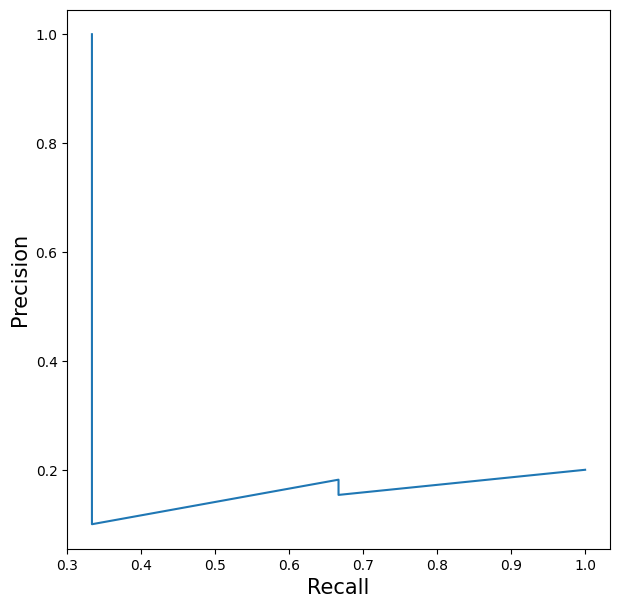

In [27]:

import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.plot(recalls, precisions)
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)

In [28]:
def f1(y_true, y_pred):
    """
    Function to calculate f1 score
    :param y_true: list of true values :param y_pred: list of predicted values :return: f1 score
    """
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    score = 2 * p * r / (p + r) 
    return score

In [29]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [30]:
y_pred = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [31]:
f1(y_true, y_pred)

0.5714285714285715

In [32]:
from sklearn import metrics

In [33]:
metrics.f1_score(y_true, y_pred)

0.5714285714285715

In [34]:
def tpr(y_true, y_pred):
    """
    Function to calculate tpr
    :param y_true: list of true values :param y_pred: list of predicted values :return: tpr/recall
    """
    return recall(y_true, y_pred)

In [35]:
def fpr(y_true, y_pred):
    """
    Function to calculate fpr
    :param y_true: list of true values :param y_pred: list of predicted values :return: fpr
    """
    fp = false_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred) 
    return fp / (tn + fp)

In [36]:

tpr_list = []
fpr_list = []

y_true = [0, 0, 0, 0, 1, 0, 1,
          0, 0, 1, 0, 1, 0, 0, 1]
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
          0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
          0.85, 0.15, 0.99]
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,
              0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

for thresh in thresholds:
  temp_pred = [1 if x >= thresh else 0 for x in y_pred]
  temp_tpr = tpr(y_true, temp_pred)
  temp_fpr = fpr(y_true, temp_pred)
  tpr_list.append(temp_tpr)
  fpr_list.append(temp_fpr)

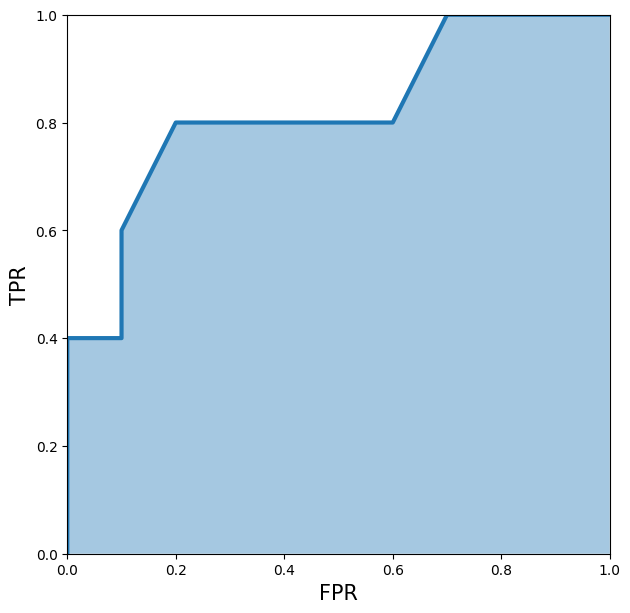

In [37]:
plt.figure(figsize=(7, 7))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show()

In [38]:
from sklearn import metrics
y_true = [0, 0, 0, 0, 1, 0, 1,
          0, 0, 1, 0, 1, 0, 0, 1]
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
          0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
          0.85, 0.15, 0.99]
metrics.roc_auc_score(y_true, y_pred)

0.8300000000000001

In [39]:
# empty lists to store true positive # and false positive values
tp_list = []
fp_list = []
# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1,
0, 0, 1, 0, 1, 0, 0, 1]
# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
0.85, 0.15, 0.99]
# some handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,
0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]
# loop over all thresholds
for thresh in thresholds:
    # calculate predictions for a given threshold
    temp_pred = [1 if x >= thresh else 0 for x in y_pred] # calculate tp
    temp_tp = true_positive(y_true, temp_pred)
    # calculate fp
    temp_fp = false_positive(y_true, temp_pred)
    # append tp and fp to lists
    tp_list.append(temp_tp)
    fp_list.append(temp_fp)

In [40]:
import numpy as np

def log_loss(y_true, y_proba):
  epsilon = 1e-15
  loss = []
  for yt, yp in zip(y_true, y_proba):
    yp = np.clip(yp, epsilon, 1 - epsilon)
    temp_loss = -1.0 * (
        yt * np.log(yp)
        + (1 - yt) * np.log(1 - yp)
    )
    loss.append(temp_loss)
    
  return np.mean(loss)

In [41]:

import numpy as np

def macro_precision(y_true, y_pred):
  num_classes = len(np.unique(y_true))
  precision = 0
  for class_ in range(num_classes):
    temp_true = [1 if p == class_ else 0 for p in y_true]
    temp_pred = [1 if p == class_ else 0 for p in y_pred]

    tp = true_positive(temp_true, temp_pred)
    fp = false_positive(temp_true, temp_pred)

    temp_precision = tp / (tp + fp)
    precision += temp_precision

  precision /= num_classes
  return precision

In [42]:
y_true = [0, 0, 0, 0, 1, 0, 1,
0, 0, 1, 0, 1, 0, 0, 1]

In [43]:
y_proba = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
0.85, 0.15, 0.99]

In [44]:
log_loss(y_true, y_proba)

0.49882711861432294

In [45]:
metrics.log_loss(y_true, y_proba)

0.49882711861432294

In [46]:
def micro_precision(y_true, y_pred):
  num_classes = len(np.unique(y_true))
  tp = 0
  fp = 0
  for class_ in range(num_classes):
    temp_true = [1 if p == class_ else 0 for p in y_true]
    temp_pred = [1 if p == class_ else 0 for p in y_pred]

    tp += true_positive(temp_true, temp_pred)
    fp += false_positive(temp_true, temp_pred)

  precision = tp / (tp + fp)
  return precision

In [47]:
from collections import Counter

def weighted_precision(y_true, y_pred):
  num_classes = len(np.unique(y_true))
  class_counts = Counter(y_true)  # {0:20, 1:15, 2:21}
  precision = 0
  for class_ in range(num_classes):
    temp_true = [1 if p == class_ else 0 for p in y_true]
    temp_pred = [1 if p == class_ else 0 for p in y_pred]

    tp = true_positive(temp_true, temp_pred)
    fp = false_positive(temp_true, temp_pred)
        
    temp_precision = tp / (tp + fp)
    weighted_precision = class_counts[class_] * temp_precision

    precision += weighted_precision
  
  overall_precision = precision / len(y_true)
  return overall_precision

In [48]:
from collections import Counter
import numpy as np

def weighted_f1(y_true, y_pred):
  num_classes = len(np.unique(y_true))
  class_counts = Counter(y_true)  # {0:20, 1:15, 2:21}
  f1 = 0
  for class_ in range(num_classes):
    temp_true = [1 if p == class_ else 0 for p in y_true]
    temp_pred = [1 if p == class_ else 0 for p in y_pred]

    p = precision(temp_true, temp_pred)
    r = recall(temp_true, temp_pred)

    if p + r != 0:
      temp_f1 = 2 * p * r / (p + r)
    else:
      temp_f1 = 0
    
    weighted_f1 = class_counts[class_] * temp_f1
    f1 += weighted_f1
  
  overall_f1 = f1 / len(y_true)
  return overall_f1
     

Text(0.5, 57.249999999999986, 'Predicted Labels')

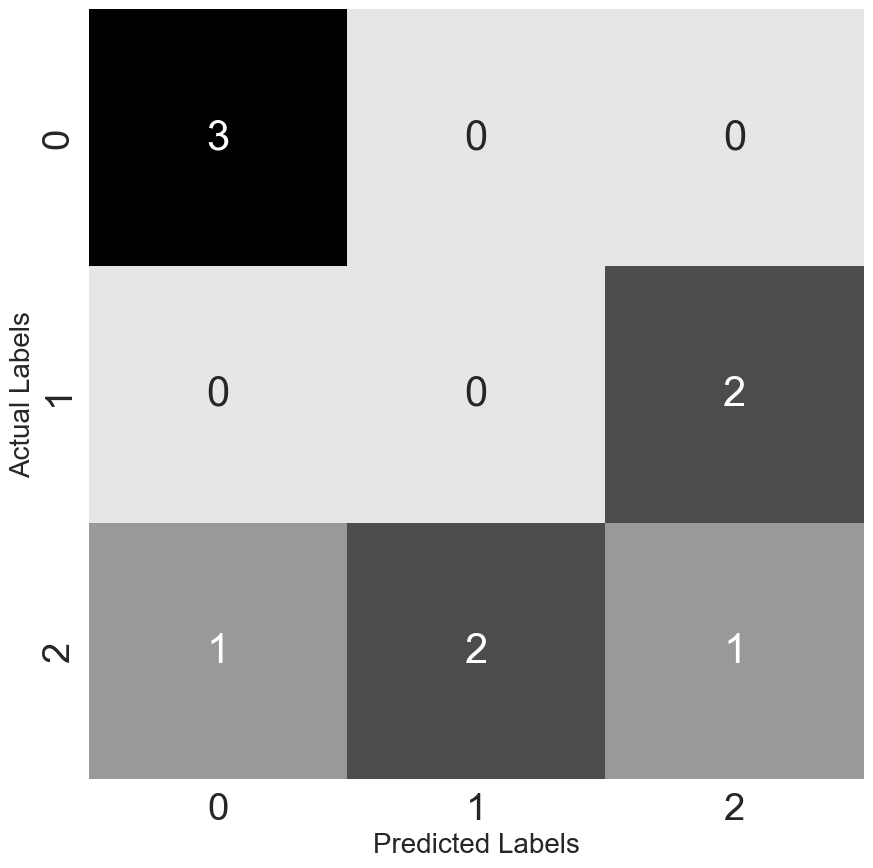

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

cm = metrics.confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,10))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.set(font_scale=2.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)

plt.ylabel('Actual Labels', fontsize=20)
plt.xlabel('Predicted Labels', fontsize=20)

In [50]:
# precision at k, P@k
def pk(y_true, y_pred, k):
  if k == 0:
    return 0

  y_pred = y_pred[:k]
  pred_set = set(y_pred)
  true_set = set(y_true)
  common_values = pred_set.intersection(true_set)
  return len(common_values) / len(y_pred[:k])

In [51]:

# precision at k, P@k
def pk(y_true, y_pred, k):
  if k == 0:
    return 0

  y_pred = y_pred[:k]
  pred_set = set(y_pred)
  true_set = set(y_true)
  common_values = pred_set.intersection(true_set)
  return len(common_values) / len(y_pred[:k])
     

# average precision at k, AP@k
def apk(y_true, y_pred, k):
  pk_values = []
  for i in range(1, k+1):
    pk_values.append(pk(y_true, y_pred, i))

  if len(pk_values) == 0:
    return 0
  return sum(pk_values) / len(pk_values)
     

In [52]:
# another version of apk, which the order of prediction matters
def apk(actual, predicted, k=10):
  if len(predicted) > k:
    predicted = predicted[:k]

  score = 0.0
  num_hits = 0.0

  for i, p in enumerate(predicted):
    print("i ", i, "p ", p)
    if p in actual and p not in predicted[:i]:
      print(predicted[:i])
      num_hits += 1.0
      score += (num_hits / i+1.0)

  if not actual:
    return 0.0
    
  return score / min(len(actual), k)
     

# mean average precision at k, MAP@k
def mapk(y_true, y_pred, k):
  apk_values = []
  for i in range(len(y_true)):
    apk_values.append(apk(y_true[i], y_pred[i], k=k))
  return sum(apk_values) / len(apk_values)

In [53]:
import numpy as np

def mean_absolute_error(y_true, y_pred):
  error = 0
  for yt, yp in zip(y_true, y_pred):
    error += np.abss(yt - yp)
    
  return error / len(y_true)
     

def mean_squared_error(y_true, y_pred):
  error = 0
  for yt, yp in zip(y_true, y_pred):
    error += (yt - yp) ** 2

  return error / len(y_true)
     

def mean_squared_log_error(y_true, y_pred):
  error = 0
  for yt, yp in zip(y_true, y_pred):
    error += (np.log(1 + yt) - np.log(1 + yp)) ** 2
  
  return error / len(y_true)
     

def mean_percentage_error(y_true, y_pred):
  error = 0
  for yt, yp in zip(y_true, y_pred):
    error += (yt - yp) / yt

  return error / len(y_true)
     

def mean_abs_percentage_error(y_true, y_pred):
  error = 0
  for yt, yp in zip(y_true, y_pred):
    error += np.abs((yt - yp) / yt)
  
  return error / len(y_true)
     

import numpy as np

def r2(y_true, y_pred):
  mean_true_value = np.mean(y_true)
  numerator = 0
  denominator = 0

  for yt, yp in zip(y_true, y_pred):
    numerator += (yt - yp) ** 2
    denominator += (yt - mean_true_value) ** 2
  
  ratio = numerator / denominator
  return 1 - ratio
     

# quadratic weighted kappa, Cohen's kappa
# measures the "agreement" between two "ratings"
# which can be defined as how close these ratings are to each other
# suitable for a classification problem with N different classes

# over 0.85 is very good

from sklearn import metrics
y_true = [1, 2, 3, 1, 2, 3, 1, 2, 3]
y_pred = [2, 1, 3, 1, 2, 3, 3, 1, 2]

metrics.cohen_kappa_score(y_true, y_pred, weights="quadratic")
     

# Matthew's Correlation Coefficient(MCC)
# ranges -1 to 1, 0 is random prediction
# can be used for problems where classes are skewed

def mcc(y_true, y_pred):
  tp = true_positive(y_true, y_pred)
  tn = true_negative(y_true, y_pred)
  fp = false_positive(y_true, y_pred)
  fn = false_negative(y_true, y_pred)

  numerator = (tp * tn) - (fp * fn)
  denominator = (
      (tp + fp) *
      (fn + tn) *
      (fp + tn) *
      (tp + fn)
  )
  denominator = denominator ** 0.5
  return numerator / denominator